___
# Ciência dos Dados - Projeto 3: Filmes#
___

### _Gabriela Caruso e Mariana Abrantes - 2C_ ###
___

## Objetivo ##

Desenvolver um programa que cria uma playlist de filmes similares a um outro usado como parâmetro.

___

## Imports

In [1]:
%matplotlib inline
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
#from emoji import UNICODE_EMOJI
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(42)


## Lendo as tabelas

In [2]:
#df = pd.read_csv('https://query.data.world/s/dgju3rv2knocz2ost6qyly7vwyekcv')
#writer = pd.ExcelWriter('Projeto3_CD.xlsx')
#df.to_excel(writer,'data')
#writer.save()

In [3]:
df = pd.read_excel('Projeto3_CD.xlsx')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Eliminando colunas

In [4]:
dado = df.drop(labels=None, axis=0, index=None, columns='movie_imdb_link', level=None, inplace=False, errors='raise')
dado2 = dado.drop(labels=None, axis=0, index=None, columns='aspect_ratio', level=None, inplace=False, errors='raise')
dado3 = dado2.drop(labels=None, axis=0, index=None, columns='language', level=None, inplace=False, errors='raise')
data = dado3.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = False)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,1.0,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


## Print das colunas

In [5]:
list(data)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'num_user_for_reviews',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes']

## Alterando os dados escritos por numéricos

In [6]:
lista_nova = []
for color in data["color"]:
    if color == " Black and White":
        lista_nova.append(1)
    elif color == "Color":
        lista_nova.append(0)
    else:
        lista_nova.append(color)
        
data["color"] = lista_nova
data.head()

C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,0,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,0,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,0,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,0,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,1.0,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


In [7]:
def numerar(dataframe, coluna):
    # Criando a lista de nomes únicos:
    unico = []
    for classe in dataframe[coluna]:
        if classe not in unico:
            unico.append(classe)
            
    # Criando a lista de nomes alterados para números:
    reclassificado = []        
    for item in dataframe[coluna]:
        reclassificado.append(unico.index(item))
    
    # Substituindo a coluna toda do DataFrame:
    dataframe[coluna] = reclassificado
    
    # Retornando o novo DataFrame:
    return dataframe

In [8]:
numerar(data, "actor_2_name")
numerar(data, "director_name")
numerar(data, "actor_1_name")
numerar(data, "movie_title")
numerar(data, "genres")
numerar(data, "actor_3_name")
numerar(data, "plot_keywords")
numerar(data, "country")
numerar(data, "content_rating")
data.head()

C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0,0,723.0,178.0,0.0,855.0,0,1000.0,760505847.0,0,...,0.0,0,3054.0,0,0,237000000.0,2009.0,936.0,7.9,33000
1,0,1,302.0,169.0,563.0,1000.0,1,40000.0,309404152.0,1,...,0.0,1,1238.0,0,0,300000000.0,2007.0,5000.0,7.1,0
2,0,2,602.0,148.0,0.0,161.0,2,11000.0,200074175.0,2,...,1.0,2,994.0,1,0,245000000.0,2015.0,393.0,6.8,85000
3,0,3,813.0,164.0,22000.0,23000.0,3,27000.0,448130642.0,3,...,0.0,3,2701.0,0,0,250000000.0,2012.0,23000.0,8.5,164000
5,0,4,462.0,132.0,475.0,530.0,4,640.0,73058679.0,4,...,1.0,4,738.0,0,0,263700000.0,2012.0,632.0,6.6,24000


## Fazendo a correlação

In [9]:
data.corr()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
color,1.000000,0.024277,0.000433,0.048309,0.058906,-0.021425,0.062496,-0.025192,-0.042298,0.067819,...,0.004143,0.058602,0.070065,0.011345,0.097749,-0.014921,-0.158317,-0.020326,0.119175,-0.024289
director_name,0.024277,1.000000,-0.339507,-0.281636,-0.171929,-0.181164,0.624622,-0.166866,-0.465605,0.319629,...,0.007803,0.764079,-0.351681,0.168772,0.284056,-0.097264,-0.087422,-0.210885,-0.112170,-0.203569
num_critic_for_reviews,0.000433,-0.339507,1.000000,0.234857,0.177149,0.254392,-0.312060,0.167554,0.468543,-0.189853,...,-0.033933,-0.371955,0.567318,-0.017015,-0.065610,0.106323,0.411971,0.255444,0.346468,0.704254
duration,0.048309,-0.281636,0.234857,1.000000,0.181995,0.127574,-0.225801,0.085524,0.249918,-0.099500,...,0.027535,-0.288015,0.355159,0.044755,-0.016686,0.069254,-0.130284,0.130587,0.364175,0.217478
director_facebook_likes,0.058906,-0.171929,0.177149,0.181995,1.000000,0.118142,-0.115055,0.089980,0.140088,-0.071437,...,-0.047847,-0.111973,0.218644,-0.043668,-0.015701,0.018739,-0.045337,0.116837,0.191590,0.162913
actor_3_facebook_likes,-0.021425,-0.181164,0.254392,0.127574,0.118142,1.000000,-0.248532,0.252132,0.301203,-0.131029,...,0.105944,-0.217025,0.206994,-0.062927,-0.105952,0.040583,0.116211,0.553807,0.065472,0.272473
actor_2_name,0.062496,0.624622,-0.312060,-0.225801,-0.115055,-0.248532,1.000000,-0.240987,-0.405730,0.334501,...,-0.030635,0.745273,-0.282693,0.200956,0.294612,-0.087494,-0.210263,-0.322557,-0.023529,-0.201464
actor_1_facebook_likes,-0.025192,-0.166866,0.167554,0.085524,0.089980,0.252132,-0.240987,1.000000,0.145277,-0.126090,...,0.061878,-0.174015,0.123186,-0.067618,-0.067127,0.016923,0.095699,0.390429,0.092918,0.130939
gross,-0.042298,-0.465605,0.468543,0.249918,0.140088,0.301203,-0.405730,0.145277,1.000000,-0.285279,...,-0.030429,-0.535177,0.547510,-0.144251,-0.260617,0.100781,0.052195,0.254231,0.214421,0.368940
genres,0.067819,0.319629,-0.189853,-0.099500,-0.071437,-0.131029,0.334501,-0.126090,-0.285279,1.000000,...,-0.062340,0.396298,-0.189125,0.056531,0.177154,-0.028989,-0.149954,-0.128304,-0.007447,-0.126498


In [10]:
print(len(data["budget"]))
print(len(data["movie_facebook_likes"]))
print(len(data["imdb_score"]))
print(len(data["gross"]))

3806
3806
3806
3806


In [11]:
data2 = data[["budget", "movie_facebook_likes", "imdb_score", "gross" ]]
data2.head()

,budget,movie_facebook_likes,imdb_score,gross
0,237000000.0,33000,7.9,760505847.0
1,300000000.0,0,7.1,309404152.0
2,245000000.0,85000,6.8,200074175.0
3,250000000.0,164000,8.5,448130642.0
5,263700000.0,24000,6.6,73058679.0


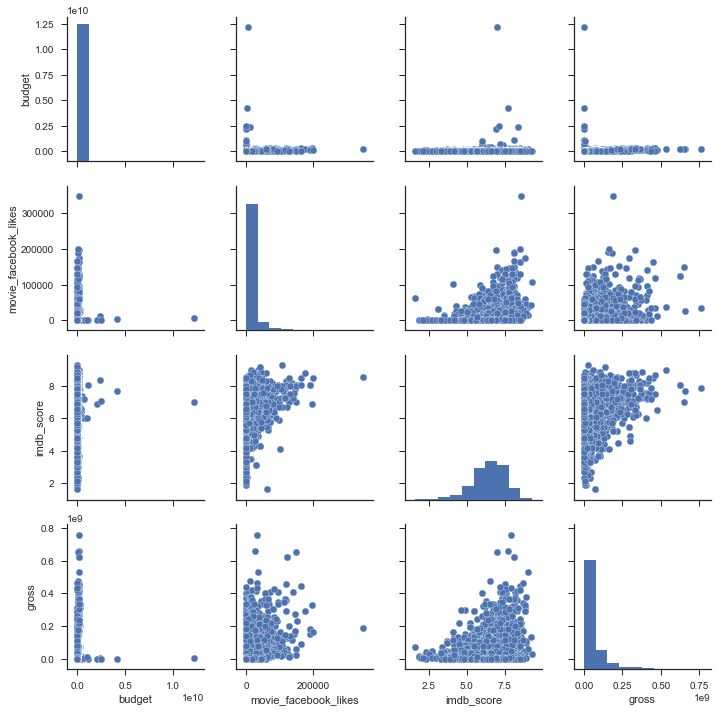

In [20]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data2)

In [13]:
#k_means = cluster.KMeans(n_clusters=3)
#k_means.fit(data)

In [14]:
#plt3d = plt.figure().gca(projection="3d")
#plt3d.scatter(data.color, data.director_name, data.num_critic_for_reviews)